# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

Датасет был создан с помощью автогенерации.

In [2]:

data = pd.read_csv('data/data.csv', sep=",")

In [3]:
data.shape

(90221, 10)

In [4]:
data.dtypes

order_id        float64
make_id         float64
time_id         float64
this_id         float64
my_float        float64
not_null        float64
not_null_int      int64
not_null_str     object
customer         object
paid             object
dtype: object

In [5]:
data.isnull().sum()

order_id         6332
make_id         16949
time_id          1794
this_id          9021
my_float        19887
not_null            0
not_null_int        0
not_null_str        0
customer         2719
paid            36147
dtype: int64

In [6]:
data.head()

,order_id,make_id,time_id,this_id,my_float,not_null,not_null_int,not_null_str,customer,paid
0,363.0,624.0,1232.0,989.0,71.440975,296.874883,661,Harley Wolf,Botsford and Terry Group,NaN
1,1243.0,1966.0,1547.0,949.0,155.029280,604.437888,698,William Reynolds,Waters LLC,False
2,1140.0,NaN,1909.0,937.0,1472.249997,954.945309,1626,Beverly Kling,Aufderhar and Sons,False
3,1417.0,1990.0,1252.0,406.0,NaN,344.048663,1151,Isom Stiedemann,Morissette Group,False
4,853.0,1075.0,1814.0,229.0,65.752680,818.549936,1084,Casper McLaughlin,Windler and Langosh Group,False


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 90221


# Обработка пропусков в данных

In [8]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)
data_new_1.head()

,not_null,not_null_int,not_null_str
0,296.874883,661,Harley Wolf
1,604.437888,698,William Reynolds
2,954.945309,1626,Beverly Kling
3,344.048663,1151,Isom Stiedemann
4,818.549936,1084,Casper McLaughlin


In [9]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)
data_new_2.head()

,order_id,make_id,time_id,this_id,my_float,not_null,not_null_int,not_null_str,customer,paid
1,1243.0,1966.0,1547.0,949.0,155.029280,604.437888,698,William Reynolds,Waters LLC,False
4,853.0,1075.0,1814.0,229.0,65.752680,818.549936,1084,Casper McLaughlin,Windler and Langosh Group,False
5,1145.0,696.0,323.0,180.0,662.503900,1476.470927,48,Ricardo Waters,Pouros LLC,False
6,1807.0,919.0,758.0,1351.0,970.812968,1885.093726,659,Shaina Reichel,Armstrong and Leuschke and Sons,False
8,772.0,1435.0,1605.0,306.0,569.528146,1640.974285,60,Buddy Gottlieb,Bruen and Sons,False


In [10]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,order_id,make_id,time_id,this_id,my_float,not_null,not_null_int,not_null_str,customer,paid
0,363.0,624.0,1232.0,989.0,71.440975,296.874883,661,Harley Wolf,Botsford and Terry Group,0
1,1243.0,1966.0,1547.0,949.0,155.029280,604.437888,698,William Reynolds,Waters LLC,False
2,1140.0,0.0,1909.0,937.0,1472.249997,954.945309,1626,Beverly Kling,Aufderhar and Sons,False
3,1417.0,1990.0,1252.0,406.0,0.000000,344.048663,1151,Isom Stiedemann,Morissette Group,False
4,853.0,1075.0,1814.0,229.0,65.752680,818.549936,1084,Casper McLaughlin,Windler and Langosh Group,False


In [11]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка order_id. Тип данных float64. Количество пустых значений 6332, 7.02%.
Колонка make_id. Тип данных float64. Количество пустых значений 16949, 18.79%.
Колонка time_id. Тип данных float64. Количество пустых значений 1794, 1.99%.
Колонка this_id. Тип данных float64. Количество пустых значений 9021, 10.0%.
Колонка my_float. Тип данных float64. Количество пустых значений 19887, 22.04%.


In [12]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,order_id,make_id,time_id,this_id,my_float
0,363.0,624.0,1232.0,989.0,71.440975
1,1243.0,1966.0,1547.0,949.0,155.029280
2,1140.0,NaN,1909.0,937.0,1472.249997
3,1417.0,1990.0,1252.0,406.0,NaN
4,853.0,1075.0,1814.0,229.0,65.752680
...,...,...,...,...,...
90216,935.0,306.0,1688.0,857.0,1051.032272
90217,1750.0,1911.0,1362.0,1964.0,446.578785
90218,836.0,1131.0,254.0,1674.0,277.896260
90219,1481.0,1004.0,199.0,1536.0,15.347896


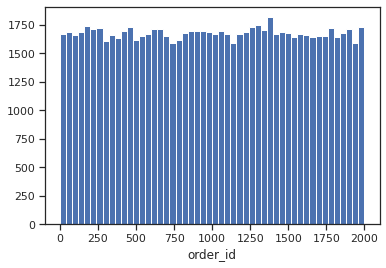

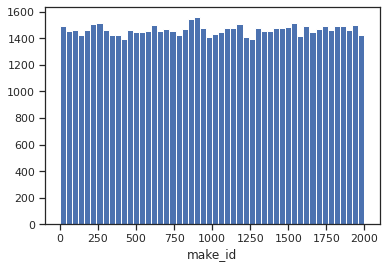

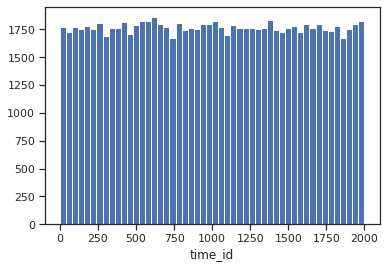

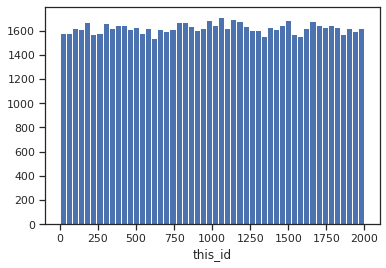

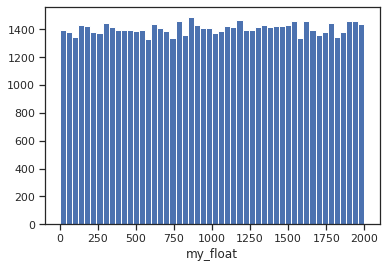

In [13]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

## Импутация данных

In [14]:
data_num_Order_id = data_num[['order_id']]
data_num_Order_id.head()

,order_id
0,363.0
1,1243.0
2,1140.0
3,1417.0
4,853.0


In [15]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [16]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Order_id)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [17]:
strategies=['mean', 'median', 'most_frequent']

In [18]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Order_id)
    return data_num_imp[mask_missing_values_only]

In [19]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([999.47238613, 999.47238613, 999.47238613, ..., 999.47238613,
        999.47238613, 999.47238613]))

In [20]:
strategies[1], test_num_impute(strategies[1])

('median', array([1001., 1001., 1001., ..., 1001., 1001., 1001.]))

In [21]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([1323., 1323., 1323., ..., 1323., 1323., 1323.]))

In [22]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [23]:
data[['time_id']].describe()

,time_id
count,88427.000000
mean,998.874869
std,576.761015
min,0.000000
25%,502.000000
50%,998.000000
75%,1498.000000
max,1999.000000


In [24]:
test_num_impute_col(data, 'time_id', strategies[0])

('time_id', 'mean', 1794, 998.8748685356283, 998.8748685356283)

In [25]:
test_num_impute_col(data, 'time_id', strategies[1])

('time_id', 'median', 1794, 998.0, 998.0)

In [26]:
test_num_impute_col(data, 'time_id', strategies[2])

('time_id', 'most_frequent', 1794, 123.0, 123.0)

## Обработка пропусков в категориальных данных

In [27]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка customer. Тип данных object. Количество пустых значений 2719, 3.01%.
Колонка paid. Тип данных object. Количество пустых значений 36147, 40.06%.


In [28]:
cat_temp_data = data[['customer']]
cat_temp_data.head()

,customer
0,Botsford and Terry Group
1,Waters LLC
2,Aufderhar and Sons
3,Morissette Group
4,Windler and Langosh Group


In [29]:
cat_temp_data['customer'].unique()

array(['Botsford and Terry Group', 'Waters LLC', 'Aufderhar and Sons',
       ..., 'Cruickshank and Maggio and Sons', 'Schmeler and Spinka Inc',
       'Kihn and Schulist Group'], dtype=object)

In [30]:
cat_temp_data[cat_temp_data['customer'].isnull()].shape

(2719, 1)

In [31]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Botsford and Terry Group'],
       ['Waters LLC'],
       ['Aufderhar and Sons'],
       ...,
       ['Satterfield Inc'],
       ['Beahan LLC'],
       ['Kihn and Schulist Group']], dtype=object)

In [32]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['Abbott Group', 'Abbott Inc', 'Abbott LLC', ...,
       'Zulauf and Yost LLC', 'Zulauf and Zemlak Group',
       'Zulauf and Ziemann Group'], dtype=object)

In [33]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Botsford and Terry Group'],
       ['Waters LLC'],
       ['Aufderhar and Sons'],
       ...,
       ['Satterfield Inc'],
       ['NA'],
       ['Kihn and Schulist Group']], dtype=object)

In [34]:

data_imp3[data_imp3=='NA'].size #- cat_temp_data[cat_temp_data['customer']==False].size

2719

In [35]:
np.unique(data_imp3)

array(['Abbott Group', 'Abbott Inc', 'Abbott LLC', ...,
       'Zulauf and Yost LLC', 'Zulauf and Zemlak Group',
       'Zulauf and Ziemann Group'], dtype=object)

## Преобразование категориальных признаков в числовые

In [36]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Botsford and Terry Group
1,Waters LLC
2,Aufderhar and Sons
3,Morissette Group
4,Windler and Langosh Group
...,...
90216,Schmeler and Spinka Inc
90217,Gutmann Inc
90218,Satterfield Inc
90219,Beahan LLC


# 

## Кодирование категорий целочисленными значениями - label encoding

In [37]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [38]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [39]:
cat_enc['c1'].unique()

array(['Botsford and Terry Group', 'Waters LLC', 'Aufderhar and Sons',
       ..., 'Cruickshank and Maggio and Sons', 'Schmeler and Spinka Inc',
       'Kihn and Schulist Group'], dtype=object)

In [40]:
np.unique(cat_enc_le)

array([    0,     1,     2, ..., 44978, 44979, 44980])

In [41]:
le.inverse_transform([0, 1, 2, 3])

array(['Abbott Group', 'Abbott Inc', 'Abbott LLC',
       'Abbott and Abbott Group'], dtype=object)

## Кодирование категорий наборами бинарных значений -

In [42]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [43]:
cat_enc.shape

(90221, 1)

In [44]:
cat_enc_ohe.shape

(90221, 44981)

In [45]:
cat_enc_ohe

<90221x44981 sparse matrix of type '<class 'numpy.float64'>'
	with 90221 stored elements in Compressed Sparse Row format>

In [46]:
#cat_enc_ohe.todense()[0:10]

In [47]:
cat_enc.head(10)

,c1
0,Botsford and Terry Group
1,Waters LLC
2,Aufderhar and Sons
3,Morissette Group
4,Windler and Langosh Group
5,Pouros LLC
6,Armstrong and Leuschke and Sons
7,Kuhlman and Schultz LLC
8,Bruen and Sons
9,Johnston and Bechtelar Inc


## Pandas get_dummies - быстрый вариант one-hot кодирования

In [48]:
#pd.get_dummies(cat_enc).head()

In [49]:
#pd.get_dummies(cat_temp_data, dummy_na=True).head()

# Масштабирование данных

In [50]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

## MinMax

In [51]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['my_float']])

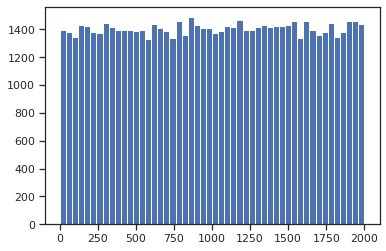

In [52]:
plt.hist(data['my_float'], 50)
plt.show()

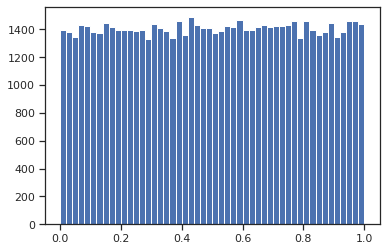

In [53]:
plt.hist(sc1_data, 50)
plt.show()

## Масштабирование данных на основе Z-оценки - StandardScaler

In [54]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['my_float']])

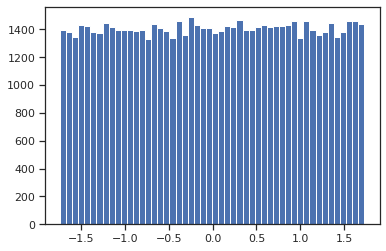

In [55]:
plt.hist(sc2_data, 50)
plt.show()